In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

## Load the data 🎉😎🧬

In [98]:
notebook_dir = os.getcwd()
print(f"Current notebook directory: {notebook_dir}")
features_file = notebook_dir + '/data/filtered_combined_data.tsv'

# recurrance
features_file = notebook_dir + '/data/filtered_recurrence.tsv'

#labels_file = os.path.join(notebook_dir, '../data/toy_labels.tsv')

features_df = pd.read_csv(features_file, sep='\t', index_col=0)
#labels_df = pd.read_csv(labels_file, sep='\t', index_col=0)

labels = pd.Series([0 if col.startswith('N') else 1 for col in features_df.columns], index=features_df.columns)

# Convert to DataFrame if needed
labels_df = labels.to_frame(name='label')

Current notebook directory: /Users/deeptimurthy/BENG203


,C1_R,C2_R,C3_R,C4_R,C5_R,C6_R,C7_R,C8_R,C9_R,C10_R,...,C87_N,C88_N,C89_N,C90_N,C91_N,C92_N,C93_N,C94_N,C95_N,C96_N
gene_symbol,,,,,,,,,,,,,,,,,,,,,
RAD52,17.859037,7.289047,26.548476,24.908245,11.785623,15.219543,9.340032,0.000000,16.130539,8.872038,...,33.145289,2.338699,3.284347,0.000000,2.883241,17.205119,2.296310,26.546970,7.965901,11.114031
LASP1,7.569685,2.162662,0.000000,2.956112,3.496796,14.450052,5.542378,0.000000,23.929669,2.632335,...,12.103647,2.775569,0.000000,4.899553,22.241913,45.942857,14.988943,4.296268,0.000000,3.297535
RECQL,2.829515,36.377709,7.360913,33.149458,22.874028,3.375854,6.905723,3.686256,29.816021,9.839556,...,5.655363,5.187478,0.000000,45.785793,3.197666,0.000000,5.093456,26.765437,0.000000,9.244532
UPF1,21.131216,7.102583,11.317831,15.776187,7.177581,22.245309,10.617951,1.619381,11.788423,6.483809,...,17.390900,22.788714,0.000000,2.681841,4.214226,0.000000,5.593918,2.351624,5.174748,5.414859
HOXA11,9.267368,0.000000,0.000000,45.238641,10.702592,5.528382,5.654491,0.000000,0.000000,24.170248,...,9.261362,8.495142,0.000000,0.000000,0.000000,0.000000,8.341169,0.000000,19.290348,0.000000
CREBBP,7.051391,26.189604,15.592414,15.145396,4.886058,13.460662,6.883858,24.803445,17.832970,22.068903,...,25.368558,18.745070,4.538726,3.803402,5.578197,4.755241,5.711995,9.338242,15.411601,6.911446
MAP3K14,3.653421,0.000000,2.376070,1.783417,10.548052,0.000000,13.374823,0.000000,25.023651,3.176165,...,5.476580,6.697981,0.000000,3.941188,51.609623,0.000000,4.932436,6.911813,0.000000,1.989396
ETV1,25.568627,22.232503,10.122021,29.303969,14.122279,23.873918,32.558014,42.000163,25.771510,15.463328,...,15.553426,21.399967,12.879861,11.992424,17.588491,3.748411,25.014399,9.464209,18.511994,8.474795
AGK,17.960746,37.319209,23.362213,23.911458,22.627964,15.584515,15.940016,29.780579,17.205579,8.516994,...,9.790421,10.477169,31.529133,14.091236,29.523826,0.000000,35.270647,6.178086,10.196159,46.233484


## Set up for cross validation 👁👄👁

In [99]:
SEED = 33
X = features_df.T.loc[labels_df.index]
y = labels_df['label'].values
num_splits = 5
cv = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=SEED)

## Train a Random Forest 🌲🌳📉

In [100]:
# Store results
accuracies = []
shap_values_all = []
explainer = None

for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(X, y), 1), total=num_splits, desc='Cross-validation'):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    # Train model
    #model = KNeighborsClassifier(n_neighbors=5)  # Example model
    #model = RandomForestClassifier(random_state=SEED) # change the model here
    #model = LogisticRegression(random_state=SEED, max_iter=1000)  # Example model
    #model = SVC(probability=True, random_state=SEED)  # Example model
    #model = MLPClassifier(random_state=SEED, max_iter=1000)  # Example model
    model = GradientBoostingClassifier(random_state=SEED, n_estimators=100, learning_rate=0.1, max_depth=3)  # Example model

    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

    # Save metrics for fold one
    if fold == 1:
        # SHAP
        #explainer = shap.Explainer(model, X_train)
        #shap_values = explainer(X_test)
        #shap_values_all.append(shap_values)

        # AUROC
        probs = model.predict_proba(X_test)[:, 1]
        first_fold_y_true = y_test
        first_fold_y_probs = probs

# Summary of performance
print(f"\nMean Accuracy 🫡: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

## SHAP evaluation 🧐📈⚖️

In [85]:
# SHAP summary plot for first fold (class 1 in binary classification)
if shap_values_all:
    shap.plots.beeswarm(shap_values_all[0][:, :, 1])

## AUROC 😱✨⁉️

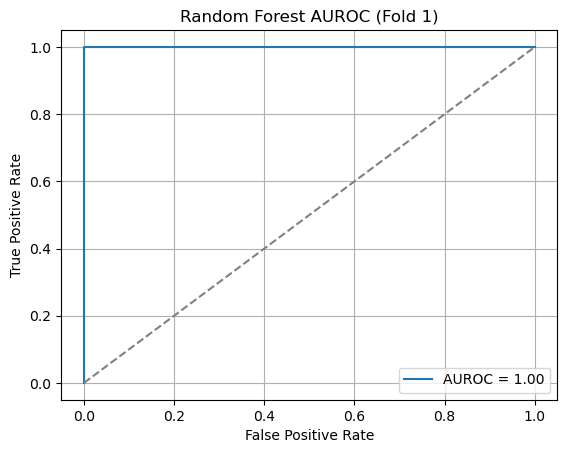

In [94]:
fpr, tpr, _ = roc_curve(first_fold_y_true, first_fold_y_probs)
auc = roc_auc_score(first_fold_y_true, first_fold_y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'AUROC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest AUROC (Fold 1)')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
print(f"\"probs\": [{', '.join([str(p) for p in probs])}],")
print(f"\"first_fold_y_true\": [{', '.join([str(p) for p in first_fold_y_true])}],")
print(f"\"first_fold_y_probs\": [{', '.join([str(p) for p in first_fold_y_probs])}]")

"probs": [3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.6463633523313347, 0.9999890313177917, 0.9999890313177917],
"first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
"first_fold_y_probs": [3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9